<a href="https://colab.research.google.com/github/Hiji1023/dl_jacobian/blob/main/Linear_Regression_N_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear Regression(N Fearture)**##

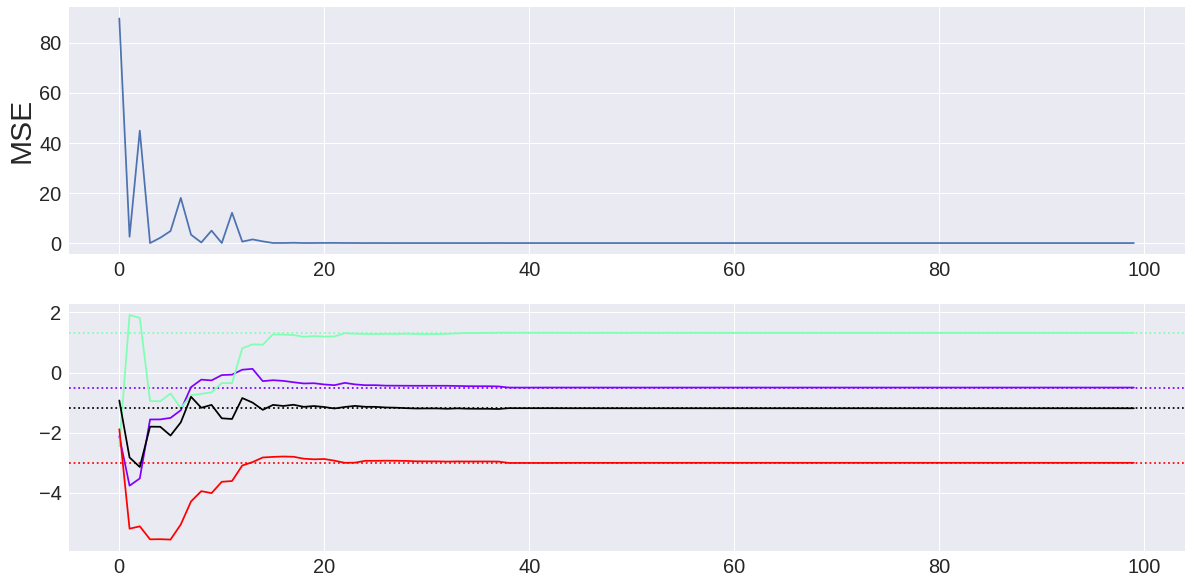

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 100, 3
lr = 0.1
# column vector로 만듬
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

# generate dataset
# N by n_feature
x_data = np.random.randn(N,n_feature)
# y_data = np.matmul(X, t_W)
y_data = x_data @ t_W + t_b

J_track = list()
W_track, b_track = list(), list()
for data_idx, (X,y) in enumerate(zip(x_data, y_data)):
  W_track.append(W)
  b_track.append(b)

  #forward propagation
  # row vector로 만듬
  X = X.reshape(1,-1)
  pred = X @ W + b
  J = (y-pred)**2
  J_track.append(J.squeeze())

  #jacobians
  dJ_dpred = -2*(y - pred)
  dpred_dW = X
  dpred_db = 1
  
  #backpropagation
  dJ_dW = dJ_dpred * dpred_dW
  dJ_db = dJ_dpred * dpred_db

  #parameter update
  W = W -lr*dJ_dW.T
  b = b -lr*dJ_db

#list인데 안에 column vector로 이뤄어짐
# print(W_track[0].shape)

#W_track = 3 by 100
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track).flatten()

#visualize loss
# pred을 그리기 어렵 - feature=3
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('rainbow', lut=n_feature)
for W_idx, (t_W,W) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_W, color=cmap(W_idx), linestyle=':')
  axes[1].plot(W, color=cmap(W_idx))
axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track, color='black')
axes[1].tick_params(labelsize=20)
print()